In [113]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [87]:
data = pd.read_csv('dataset.csv')

In [88]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
data.shape

(1460, 81)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [91]:
data.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.0,422.0,1.0,366.0,730.0,1095.0,1460.0
MSSubClass,1460.0,57.0,42.0,20.0,20.0,50.0,70.0,190.0
LotFrontage,1201.0,70.0,24.0,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,10517.0,9981.0,1300.0,7554.0,9478.0,11602.0,215245.0
OverallQual,1460.0,6.0,1.0,1.0,5.0,6.0,7.0,10.0
OverallCond,1460.0,6.0,1.0,1.0,5.0,5.0,6.0,9.0
YearBuilt,1460.0,1971.0,30.0,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1460.0,1985.0,21.0,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1452.0,104.0,181.0,0.0,0.0,0.0,166.0,1600.0
BsmtFinSF1,1460.0,444.0,456.0,0.0,0.0,384.0,712.0,5644.0


In [92]:
data.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [93]:
# Listing the null columns with the total number of nulls
nullCols = {}
nulls = data.isna().sum()
indexes = list(nulls.index)
for i in range(len(nulls)):
    if nulls.iloc[i] > 0:
        #nullCols.append(indexes[i])
        nullCols[f'{indexes[i]}'] = nulls.iloc[i]
nullCols

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [94]:
numericNulls = ['LotFrontage','MasVnrArea','GarageYrBlt',]
categoricalNulls = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu',
                    'GarageType','GarageFinish','GarageQual','GarageCond']

# Drop columns with nan values greater than 50% of the total data set and unecessary column ID
data.drop(['Id','Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

#Imputing mean value for numerical columns and median value for categorical columns
for i in numericNulls:
    data[f"{i}"].fillna(data[f"{i}"].mean(skipna=True), inplace=True)

for i in categoricalNulls:
    data[f"{i}"].fillna(data[f"{i}"].mode().iloc[0], inplace=True)

data.isna().sum().sort_values(ascending=False)

MSSubClass     0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 76, dtype: int64

In [95]:
numerics = ['int16', 'int32', 'int64','float64']
df = data.select_dtypes(include=numerics)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


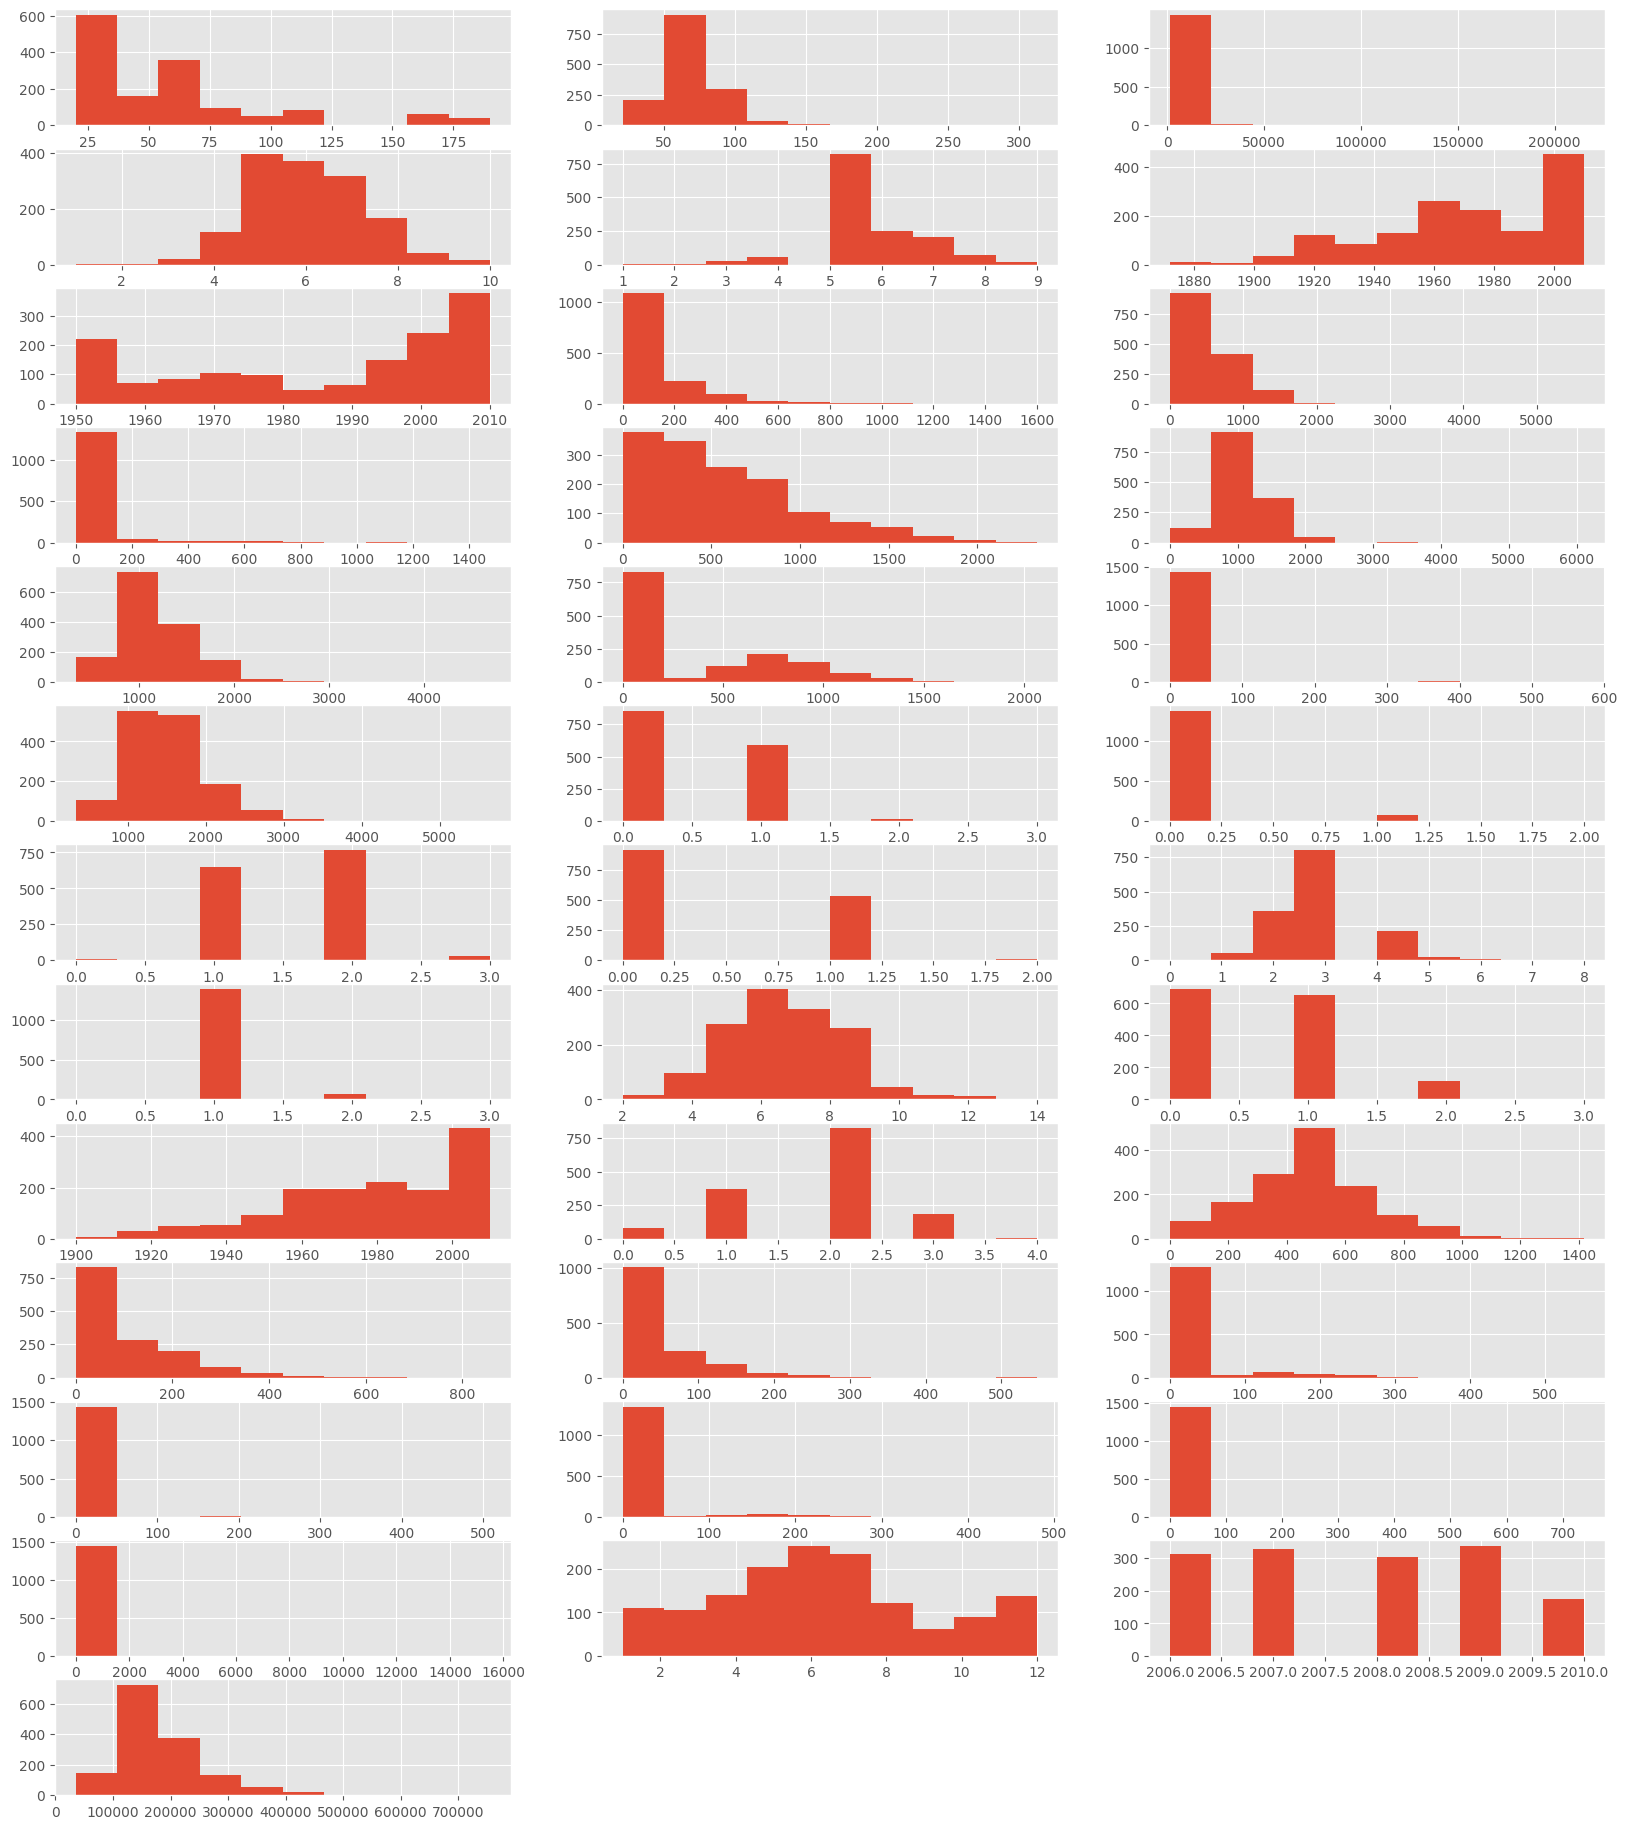

In [96]:
#Distribution of Numerical columns
cols=list(df.columns)
plt.figure(figsize=(20,25))

for i in range(len(cols)):
    j = i+1
    plt.subplot(14, 3, j)
    fig = data[f'{cols[i]}'].hist()
plt.show()

[Text(0.5, 0, 'SalePrice')]

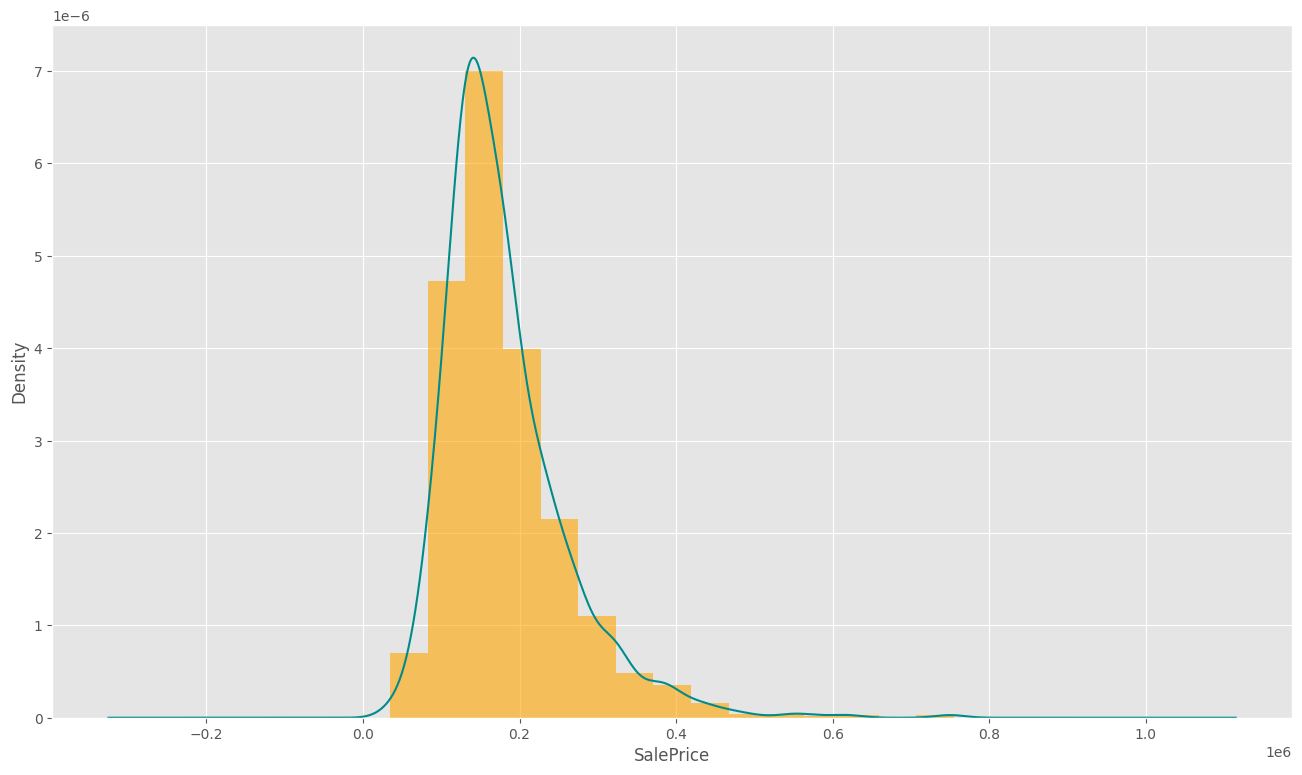

In [97]:
#Analysis of Target Variable
y = data['SalePrice']
#X = data.drop('SalePrice', axis=1, inplace=True)

ax = y.hist(bins=15, density=True, stacked=True, color='orange', alpha=0.6)
y.plot(kind='density', color='darkcyan')
ax.set(xlabel='SalePrice')

Text(0.5, 1.0, 'Distribución SalePrice')

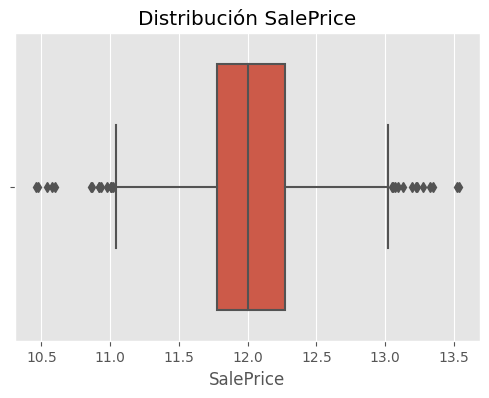

In [98]:
fig=plt.figure(figsize=(6,4))
ax=sns.boxplot(np.log(y))
ax.set_title('Distribución SalePrice')

range(0, 1460)

#### Bivariate Analysis

<AxesSubplot:title={'center':'Correlación de Pearson para las Features'}>

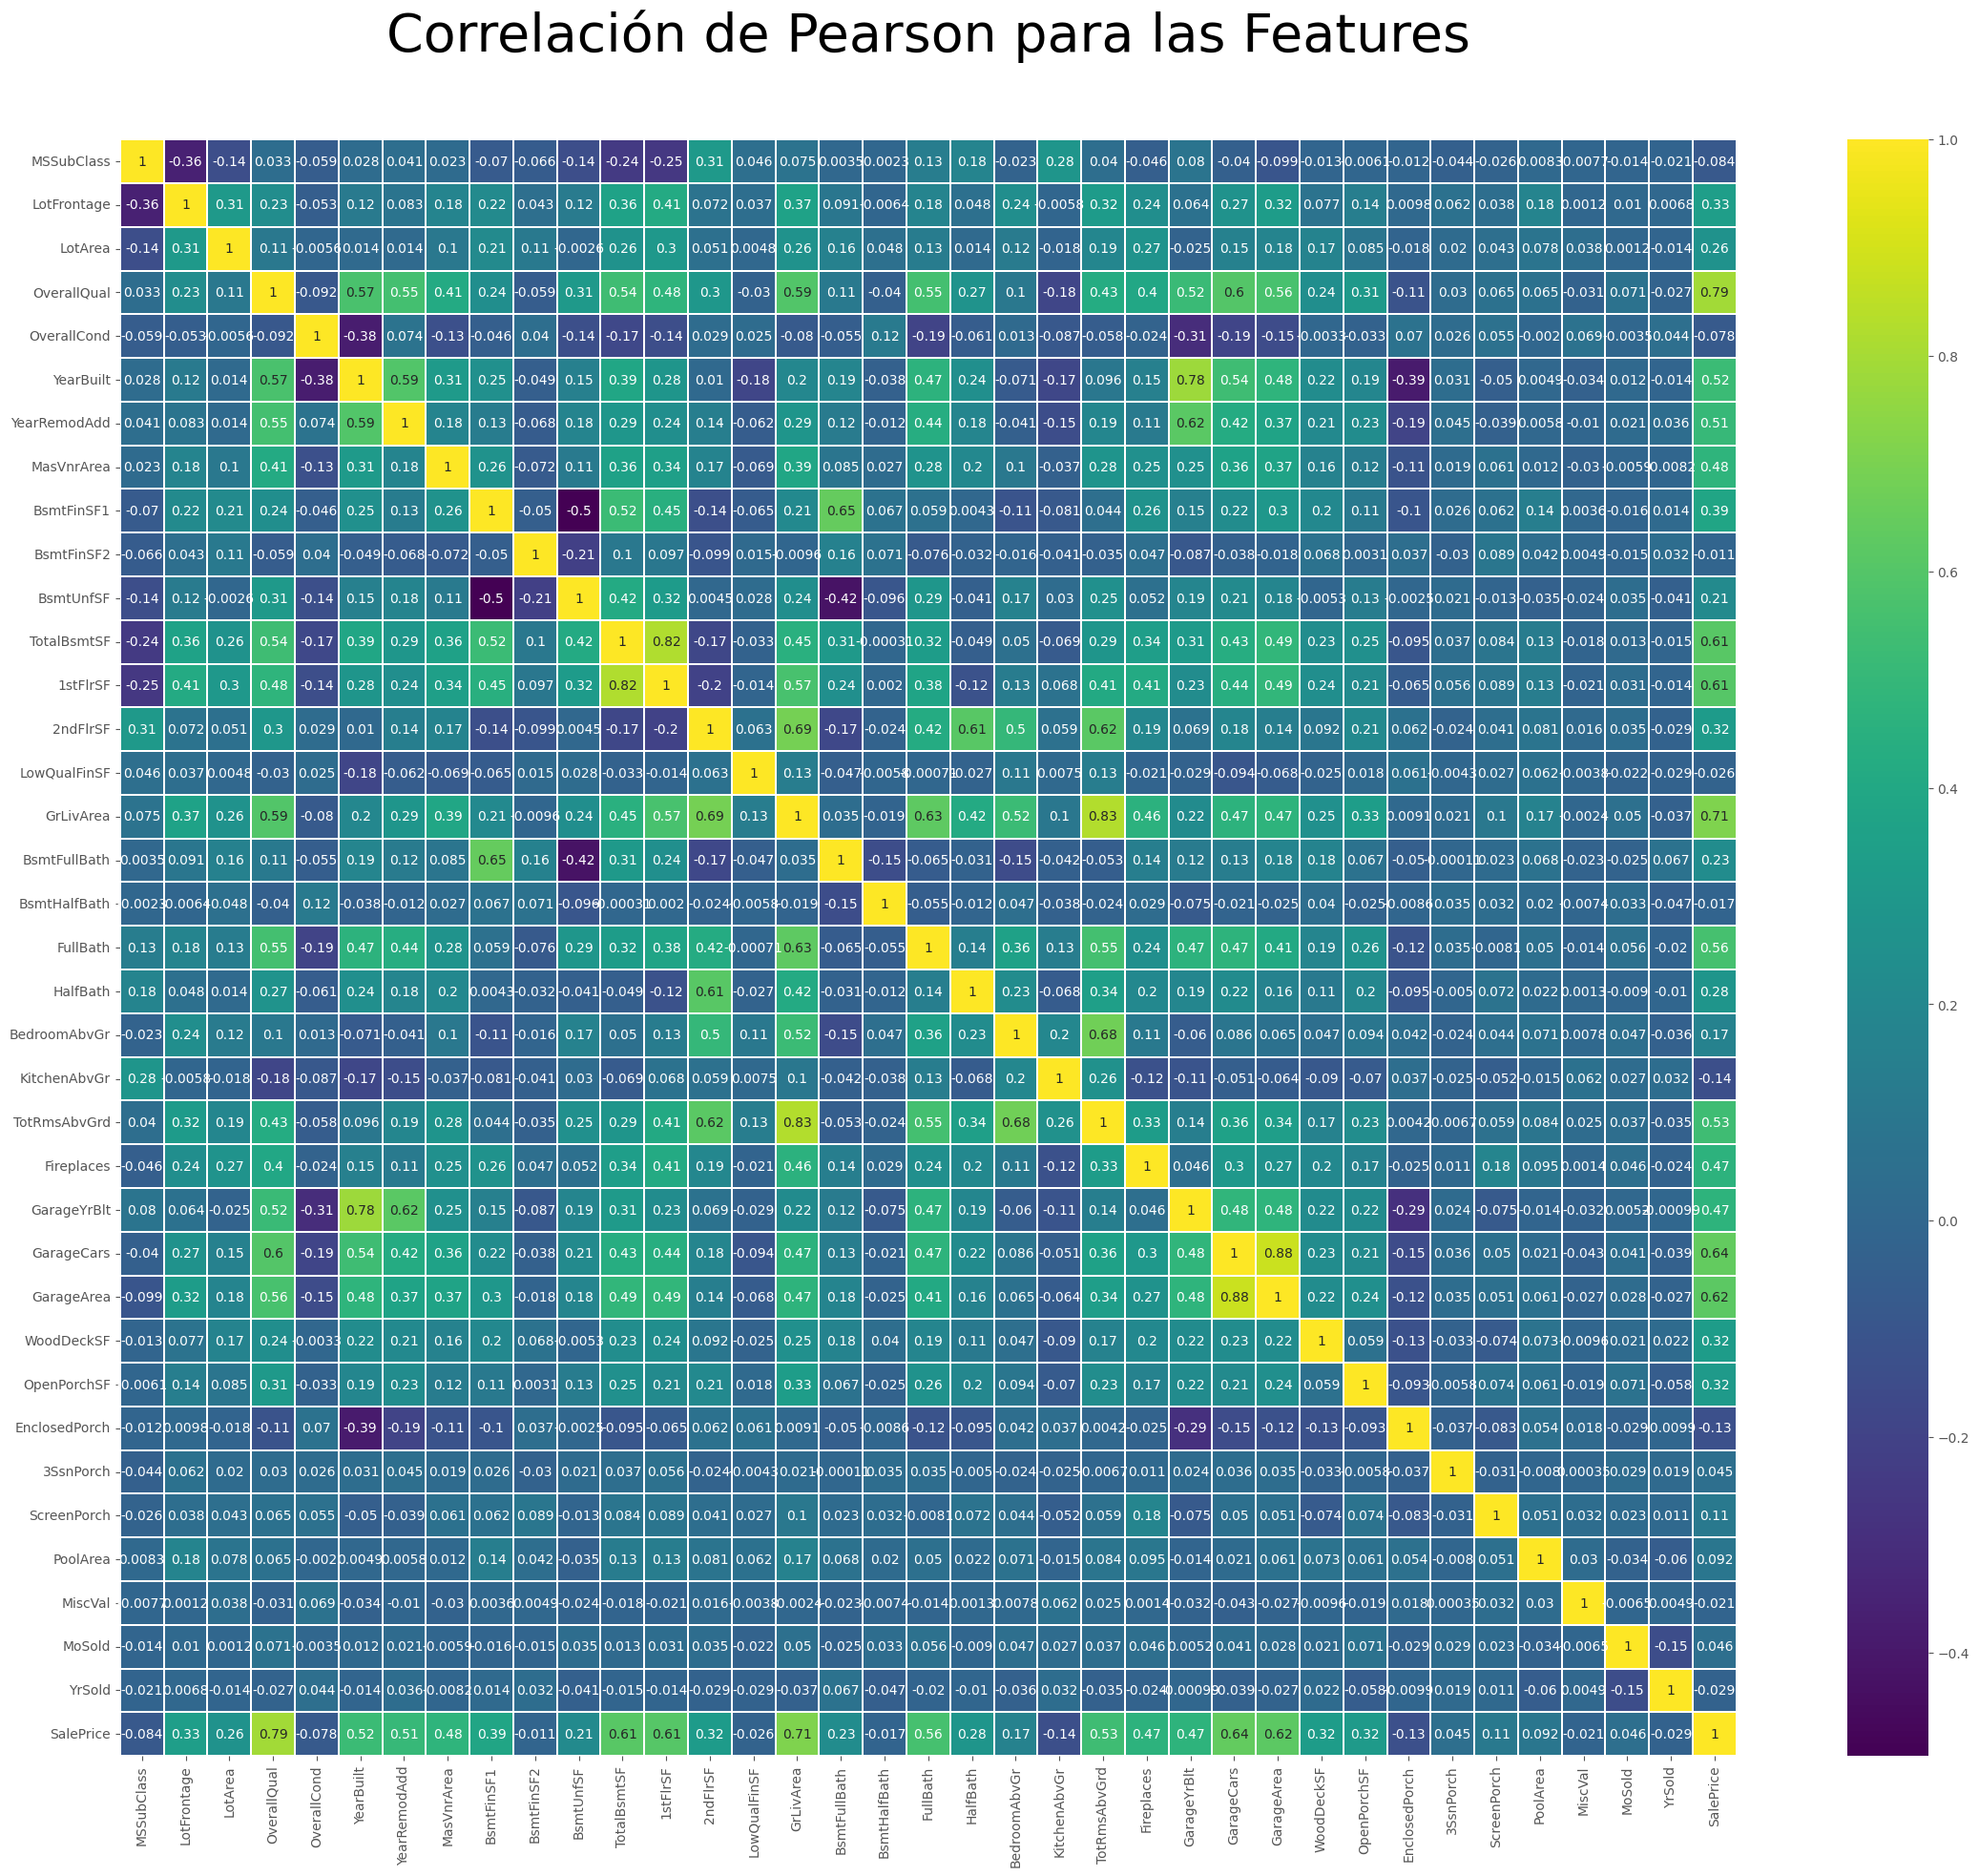

In [99]:
import seaborn as sb
colormap = plt.cm.viridis
plt.figure(figsize=(30,22))
plt.title('Correlación de Pearson para las Features', y=1.05, size=40)
sb.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [100]:
# Selecting features with correlation greater than 30%
corr_feat = data.corr()[data.corr()['SalePrice'] > 0.3]['SalePrice'].sort_values(ascending=False).index
print(corr_feat)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')


In [102]:
vars_list = list(corr_feat)
cat_feat = []
num_feat = []
for var in vars_list:
    # Categorical variable
    if len(df[var].unique()) <= 20:
        cat_feat.append(var)
    # Numerical variable
    else:
        num_feat.append(var)
print('Categoricals: ', cat_feat)
print('Numericals: ', num_feat)

Categoricals:  ['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces']
Numericals:  ['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']


In [104]:
new_Data = data[vars_list]
X = new_Data.drop('SalePrice', axis=1)
y = new_Data.SalePrice
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,7,1710,2,548,856,856,2,8,2003,2003,196.0,2003.0,0,706,65.0,0,854,61
1,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1976.0,1,978,80.0,298,0,0
2,7,1786,2,608,920,920,2,6,2001,2002,162.0,2001.0,1,486,68.0,0,866,42
3,7,1717,3,642,756,961,1,7,1915,1970,0.0,1998.0,1,216,60.0,0,756,35
4,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,2000.0,1,655,84.0,192,1053,84


#### Modeling

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression Model

In [107]:
Linear_Model = LinearRegression()
Linear_Model.fit(X_train,y_train)

pred = Linear_Model.predict(X_test) #Prediction on test data  
pred_train = Linear_Model.predict(X_train) # prediction on train data

print(f"Mean absolute error of test data is {mean_absolute_error(y_test, pred)}")
print(f"Mean absolute error of train data is {mean_absolute_error(y_train, pred_train)}")
# RMSE
print(f"RMSE of test data is {mean_squared_error(y_test, pred , squared=False)}")
print(f"RMSE of train data is {mean_squared_error(y_train, pred_train,squared=False)}")
# R^2
print(f"R^2 of test data is {r2_score(y_test, pred)}")
print(f"R^2 of train data is {r2_score(y_train, pred_train)}")

Mean absolute error of test data is 24129.536261007714
Mean absolute error of train data is 22211.13600106873
RMSE of test data is 37864.40438674587
RMSE of train data is 35983.0301633497
R^2 of test data is 0.8130831621972446
R^2 of train data is 0.7829210288628069


#### Decision Tree

In [109]:
dt_reg = DecisionTreeRegressor()
dt_reg = dt_reg.fit(X_train, y_train)

# generating predictions for the decision tree regressor
y_pred_dt = dt_reg.predict(X_test)
pred_train = dt_reg.predict(X_train) # prediction on train data

print(f"Mean absolute error of test data is {mean_absolute_error(y_test, y_pred_dt)}")
print(f"Mean absolute error of train data is {mean_absolute_error(y_train, pred_train)}")
# RMSE
print(f"RMSE of test data is {mean_squared_error(y_test, y_pred_dt , squared=False)}")
print(f"RMSE of train data is {mean_squared_error(y_train, pred_train,squared=False)}")
# R^2
print(f"R^2 of test data is {r2_score(y_test, y_pred_dt)}")
print(f"R^2 of train data is {r2_score(y_train, pred_train)}")

Mean absolute error of test data is 25777.94178082192
Mean absolute error of train data is 32.23287671232877
RMSE of test data is 40184.771246926466
RMSE of train data is 516.0253391888149
R^2 of test data is 0.7894723383922421
R^2 of train data is 0.9999553558719886


#### Random Forest

In [111]:
rf_reg = RandomForestRegressor(n_estimators = 200)
rf_reg = rf_reg.fit(X_train, y_train)

# generating predictions for the random forest regressor
y_pred_rf = rf_reg.predict(X_test)
pred_train = rf_reg.predict(X_train) # prediction on train data

print(f"Mean absolute error of test data is {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean absolute error of train data is {mean_absolute_error(y_train, pred_train)}")
# RMSE
print(f"RMSE of test data is {mean_squared_error(y_test, y_pred_rf , squared=False)}")
print(f"RMSE of train data is {mean_squared_error(y_train, pred_train,squared=False)}")
# R^2
print(f"R^2 of test data is {r2_score(y_test, y_pred_rf)}")
print(f"R^2 of train data is {r2_score(y_train, pred_train)}")

Mean absolute error of test data is 18661.23768835617
Mean absolute error of train data is 6938.195352739727
RMSE of test data is 29345.326541912797
RMSE of train data is 11752.994153235417
R^2 of test data is 0.8877299130974909
R^2 of train data is 0.9768410252624439


#### Gradient Boosted Trees

In [115]:
gb_reg=GradientBoostingRegressor(n_estimators=500,max_depth=3,learning_rate=0.1,random_state=33)
gb_reg.fit(X_train,y_train)

y_pred_gb = gb_reg.predict(X_test)
pred_train = gb_reg.predict(X_train) # prediction on train data

print(f"Mean absolute error of test data is {mean_absolute_error(y_test, y_pred_gb)}")
print(f"Mean absolute error of train data is {mean_absolute_error(y_train, pred_train)}")
# RMSE
print(f"RMSE of test data is {mean_squared_error(y_test, y_pred_gb , squared=False)}")
print(f"RMSE of train data is {mean_squared_error(y_train, pred_train,squared=False)}")
# R^2
print(f"R^2 of test data is {r2_score(y_test, y_pred_gb)}")
print(f"R^2 of train data is {r2_score(y_train, pred_train)}")

Mean absolute error of test data is 19083.453274078067
Mean absolute error of train data is 6058.412131780227
RMSE of test data is 29266.95858779488
RMSE of train data is 8010.944845493496
R^2 of test data is 0.888328756581812
R^2 of train data is 0.9892405574215288
